## Kutatási kérdés és módszertan

Az ember által létrehozott társadalmakban a családok többnyire házasság útján jönnek létre. A társadalmi szerveződések (családok, klánok, nemzetek) univerzálisak, azonban ezek a társadalmi szerveződések, így a családok létrejöttéhez kötődő szokások is kultúrspecifikusak. A házassági szokások is kulturális sokszínűséget mutatnak (Hendry, 1999). A házassági szokások számos jellemző jegy mentén mutatnak különbségeket. Részletesen kutatott téma többek között a rokonok közötti házasság tabusításának kérdése (Fox, 1983; Parker, 1996) és a monogámia-poligámia elkülönülése (Ophir&Solomon, 2020). Azt, hogy milyen házassági szokások alakulnak ki, számos tényezőre vezetik vissza a kutatók, mint például a gazdasági előnyszerzés (Itao&Kaneko, 2020). Érdekes felvetés, hogy vajon ilyen tényező-e az éghajlat. Ezek alapján a kutatási kérdésem a következő: Eltérőek-e az eltérő éghajlaton élő emberek házassággal kapcsolatos szokásai? A kérdést úgy igyekszem megválaszolni, hogy klaszterelemzést végzek és megnézem, hogy a házassághoz kapcsolódó változók (pl. monogámia vagy poligámia jellemző az adott kultúrára; jellemző-e a házasság során a hozományadás stb.) mentén milyen klaszterek rajzolódnak ki. Majd azt vizsgálom, hogy a klaszterek az éghajlathoz köthető változók (pl. átlaghőmérséklet) is különböznek-e.

In [1]:
import pandas as pd

## 1. lépés Adatok beolvasása, adattáblá(k)ba rendezése, a szükséges oszlopok kiválasztása


Az elemzéshez két nagy adatbázist használtam forrásul: az Etnográfiai Atlaszt (Murdock et al., 1999) és az ecoClimate adatbázist (Lima-Ribeiro et al., 2015).

In [2]:
data_path = "../data/raw/EA/data.csv"
codes_path = "../data/raw/EA/codes.csv"
societies_path = "../data/raw/EA/societies.csv"
societies_mapping_path = "../data/raw/EA/societies_mapping.csv"
variables_path = "../data/raw/EA/variables.csv"
climate_path = "../data/raw/ecoClimate/data.csv"

### 1.1 Az éghajlatra vonatkozó adat előkészítése

Beolvassuk az éghajlat adatot Pandas dataframe-ként. Megismerkedünk az adattal: lekérjük a head-et és a shape-t, hogy meglássuk mekkora az adattábla és milyen oszlopokat tartalmaz.

In [3]:
climate_data = pd.read_csv(climate_path)
climate_data.head()

,soc_id,sub_case,year,var_id,code,comment,references,source_coded_data,admin_comment
0,SCCS1,NaN,NaN,MonthlyMeanPrecipitation,17684.07470,NaN,NaN,NaN,NaN
1,SCCS2,NaN,NaN,MonthlyMeanPrecipitation,89005.31128,NaN,NaN,NaN,NaN
2,SCCS3,NaN,NaN,MonthlyMeanPrecipitation,134197.58310,NaN,NaN,NaN,NaN
3,SCCS4,NaN,NaN,MonthlyMeanPrecipitation,105957.49020,NaN,NaN,NaN,NaN
4,SCCS5,NaN,NaN,MonthlyMeanPrecipitation,122664.12910,NaN,NaN,NaN,NaN


In [4]:
climate_data.shape

(19880, 9)

Az éghajlat adattáblából nekünk nincs szükségünk az összes oszlopra. Kiválasztjuk azokat, amelyekre szükségünk van: a kultúrák azonosítója (soc_id), a változók azonosítója (var_id) és a változók értékei (code). Ezekkel az oszlopokkal egy új adattáblát készítünk (climate).

In [5]:
climate = climate_data[["soc_id", "var_id", "code"]].copy()
climate.head()

,soc_id,var_id,code
0,SCCS1,MonthlyMeanPrecipitation,17684.07470
1,SCCS2,MonthlyMeanPrecipitation,89005.31128
2,SCCS3,MonthlyMeanPrecipitation,134197.58310
3,SCCS4,MonthlyMeanPrecipitation,105957.49020
4,SCCS5,MonthlyMeanPrecipitation,122664.12910


In [6]:
climate.shape

(19880, 3)

A climate adattábla adataiból egy új adattáblát hozunk létre a következő módon. A változókat (átlagcsapadék, átlaghőmérséklet) megtesszük oszlopoknak, amelyeket feltölrünk az értékeikkel (code), indexbe tesszük a kultúrákat.

In [7]:
df_climate = climate.pivot(columns="var_id", values="code", index=["soc_id"])
df_climate.head()
df_climate

var_id,AnnualMeanTemperature,AnnualPrecipitationVariance,AnnualTemperatureVariance,MonthlyMeanPrecipitation,PrecipitationConstancy,PrecipitationContingency,PrecipitationPredictability,TemperatureConstancy,TemperatureContingency,TemperaturePredictability
soc_id,,,,,,,,,,
Aa1,21.035150,1.160174e+10,14.598620,87000.00141,0.202518,0.275561,0.478079,0.457627,0.206115,0.663742
Aa2,19.014197,3.357365e+09,1.212090,50566.30196,0.439799,0.147196,0.586995,0.667196,0.093770,0.760966
Aa3,20.435855,2.158663e+09,20.629575,39669.85532,0.304052,0.159731,0.463784,0.427581,0.215104,0.642685
Aa4,22.663076,3.648138e+09,8.882310,42805.12609,0.194716,0.207159,0.401874,0.493361,0.152030,0.645391
Aa5,21.417800,9.483286e+09,0.305852,243307.94900,0.673789,0.114119,0.787908,0.769289,0.044588,0.813878
...,...,...,...,...,...,...,...,...,...,...
ec17,-5.450823,3.253074e+09,293.606845,67277.51153,0.469766,0.237031,0.706797,0.189064,0.360252,0.549316
ec18,-2.851321,3.813546e+09,277.559417,73669.72815,0.465440,0.209449,0.674889,0.198889,0.362224,0.561113
ec19,-5.380601,7.451844e+08,136.906919,45846.32194,0.566427,0.064931,0.631359,0.246243,0.322093,0.568336


Az éghajlatra vonatkozó változók közül nincs szükségünk az összesre, most csak az éves átlaghőmérsékletet és a havi átlag csapadékot fogjuk használni. Természetesen használhatnánk a többi éghajlati változót is, ami komplexebb elemzést eredményezne.

In [8]:
df_climate_filtered = df_climate[["AnnualMeanTemperature", "MonthlyMeanPrecipitation"]].copy()
df_climate_filtered.head()

var_id,AnnualMeanTemperature,MonthlyMeanPrecipitation
soc_id,,
Aa1,21.035150,87000.00141
Aa2,19.014197,50566.30196
Aa3,20.435855,39669.85532
Aa4,22.663076,42805.12609
Aa5,21.417800,243307.94900


In [9]:
climate_final = df_climate_filtered.reset_index()
climate_final.head()

var_id,soc_id,AnnualMeanTemperature,MonthlyMeanPrecipitation
0,Aa1,21.035150,87000.00141
1,Aa2,19.014197,50566.30196
2,Aa3,20.435855,39669.85532
3,Aa4,22.663076,42805.12609
4,Aa5,21.417800,243307.94900


### 1.2 A házassági szokásokra vonatkozó adat előkészítése

Beolvassuk a házassági és sok más kulturális szokásokat tartalmazó adatot Pandas dataframe-ként. Megismerkedünk az adattal: lekérjük a head-et és a shape-t, hogy meglássuk mekkora az adattábla és milyen oszlopokat tartalmaz.

In [10]:
data = pd.read_csv(data_path)
data.head()

,soc_id,sub_case,year,var_id,code,comment,references,source_coded_data,admin_comment
0,Aa1,Nyai Nyae region,1950.0,EA001,8.0,NaN,biesele1972; biesele1975; biesele1976; draper1...,EthnographicAtlas_1967_p62,NaN
1,Aa2,with special reference to Central Dorobo,1920.0,EA001,4.0,NaN,huntingford1929; huntingford1942; huntingford1...,EthnographicAtlas_1967_p62,NaN
2,Aa3,Gei/Khauan tribe,1840.0,EA001,1.0,NaN,hoernl1918; hoernl1925; kohler1970; murdock193...,EthnographicAtlas_1967_p62,NaN
3,Aa4,NaN,1920.0,EA001,4.0,NaN,lebzelter1934; schmidt1930; vedder1923,Ethnology_Vol1_No3_Jul_1962,NaN
4,Aa5,"Epulu net-hunters, Ituri forest",1930.0,EA001,3.0,NaN,deleeuwe1966; hart1978; putnam1948; turnbull19...,EthnographicAtlas_1967_p62,NaN


Egy új adattáblába átmásoljuk a számunkra releváns oszlopokat. Kiválasztjuk azokat, amelyekre szükségünk van: a kultúrák azonosítója (soc_id), a változók azonosítója (var_id) és a változók értékei (code). Ezekkel az oszlopokkal egy új adattáblát készítünk (my_df_1).

In [11]:
my_df_1 = data[["soc_id", "var_id", "code"]].copy()
my_df_1.head()

,soc_id,var_id,code
0,Aa1,EA001,8.0
1,Aa2,EA001,4.0
2,Aa3,EA001,1.0
3,Aa4,EA001,4.0
4,Aa5,EA001,3.0


In [12]:
my_df_1.shape

(121354, 3)

Beolvassuk a kulturákra vonatkozó adatokhoz tartozó kódolást tartalmazó adattáblát pandas dataframe-ként.

In [13]:
codes = pd.read_csv(codes_path)
codes.head()

,var_id,code,description,name
0,EA001,0.0,Zero to 5 percent dependence,0-5%
1,EA001,1.0,6 to 15 percent dependence,6-15%
2,EA001,2.0,16 to 25 percent dependence,16-25%
3,EA001,3.0,26 to 35 percent dependence,26-35%
4,EA001,4.0,36 to 45 percent dependence,36-45%


In [14]:
codes.shape

(756, 4)

Összeillesztjük a kódokat és az adatokat tartalmazó adattáblát a változók azonosítója (var_id) és az értékek (codes) oszlopai mentén. Azért kell egyszerre a két oszlopot néznünk, mert a leírások (description) és ezek elnevezései (name) így fognak a megfelelő sorhoz kerülni. Ugyanis 1-es kódot pl. több változó is kap. Így válik egyértelművé az adattáblák összeolvasztása.

In [15]:
df_merge_1 = pd.merge(codes,my_df_1, on=["var_id", "code"])
df_merge_1.head()

,var_id,code,description,name,soc_id
0,EA001,0.0,Zero to 5 percent dependence,0-5%,Ab10
1,EA001,0.0,Zero to 5 percent dependence,0-5%,Ab12
2,EA001,0.0,Zero to 5 percent dependence,0-5%,Ab13
3,EA001,0.0,Zero to 5 percent dependence,0-5%,Ab15
4,EA001,0.0,Zero to 5 percent dependence,0-5%,Ab17


In [16]:
df_merge_1.shape

(120401, 5)

Beolvassuk a változókat tartalmazó adattáblát.

In [17]:
variables = pd.read_csv(variables_path)
variables.head()

,id,category,title,definition,type,units,source,changes,notes
0,EA001,"Subsistence, Economy",Subsistence economy: gathering,Dependence on the gathering of wild plants and...,Ordinal,NaN,Murdock (1962-1971); Gray (1999),NaN,NaN
1,EA002,"Subsistence, Economy",Subsistence economy: hunting,"Dependence on hunting, including trapping and ...",Ordinal,NaN,Murdock (1962-1971); Gray (1999),NaN,NaN
2,EA003,"Subsistence, Economy",Subsistence economy: fishing,"Dependence on fishing, including shellfishing ...",Ordinal,NaN,Murdock (1962-1971); Gray (1999),NaN,NaN
3,EA004,"Subsistence, Economy",Subsistence economy: animal husbandry,"Dependence on animal husbandry, relative to ot...",Ordinal,NaN,Murdock (1962-1971); Gray (1999),NaN,NaN
4,EA005,"Subsistence, Economy",Subsistence economy: agriculture,"Dependence on agriculture, relative to other s...",Ordinal,NaN,Murdock (1962-1971); Gray (1999),NaN,NaN


In [18]:
variables.shape

(94, 9)

Kiválasztjuk a számunkra szükséges oszlopokat és egy új adattáblába másoljuk őket. Az id változót átnevezzük, mert ez a többi adattáblában a változók azonosítója (var_id).

In [19]:
my_df_2 = variables[["id", "category", "title", "definition"]].copy()
my_df_2.rename(columns={"id" : "var_id"}, inplace=True)
my_df_2.head()

,var_id,category,title,definition
0,EA001,"Subsistence, Economy",Subsistence economy: gathering,Dependence on the gathering of wild plants and...
1,EA002,"Subsistence, Economy",Subsistence economy: hunting,"Dependence on hunting, including trapping and ..."
2,EA003,"Subsistence, Economy",Subsistence economy: fishing,"Dependence on fishing, including shellfishing ..."
3,EA004,"Subsistence, Economy",Subsistence economy: animal husbandry,"Dependence on animal husbandry, relative to ot..."
4,EA005,"Subsistence, Economy",Subsistence economy: agriculture,"Dependence on agriculture, relative to other s..."


Összeillesztjük a fentebb létrejött összeillesztett adattáblát (df_merge_1) és a változókat szövegesen felsoroló adattáblát.

In [20]:
df_merge_2 = pd.merge(df_merge_1,my_df_2, on=["var_id"])
df_merge_2.head()

,var_id,code,description,name,soc_id,category,title,definition
0,EA001,0.0,Zero to 5 percent dependence,0-5%,Ab10,"Subsistence, Economy",Subsistence economy: gathering,Dependence on the gathering of wild plants and...
1,EA001,0.0,Zero to 5 percent dependence,0-5%,Ab12,"Subsistence, Economy",Subsistence economy: gathering,Dependence on the gathering of wild plants and...
2,EA001,0.0,Zero to 5 percent dependence,0-5%,Ab13,"Subsistence, Economy",Subsistence economy: gathering,Dependence on the gathering of wild plants and...
3,EA001,0.0,Zero to 5 percent dependence,0-5%,Ab15,"Subsistence, Economy",Subsistence economy: gathering,Dependence on the gathering of wild plants and...
4,EA001,0.0,Zero to 5 percent dependence,0-5%,Ab17,"Subsistence, Economy",Subsistence economy: gathering,Dependence on the gathering of wild plants and...


### 1.3 A kultúrákra/társadalmakra vonatkozó adat előkészítése

Beolvassuk a kultúrákra/társadalmakra adatot Pandas dataframe-ként. Megismerkedünk az adattal: lekérjük a head-et és a shape-t, hogy meglássuk mekkora az adattábla és milyen oszlopokat tartalmaz

In [21]:
societies = pd.read_csv(societies_path)
societies.head()

,id,xd_id,pref_name_for_society,glottocode,ORIG_name_and_ID_in_this_dataset,alt_names_by_society,main_focal_year,HRAF_name_ID,HRAF_link,origLat,origLong,Lat,Long,Comment,glottocode_comment
0,Aa1,xd1,!Kung,juho1239,Kung (Aa1),"Kung Bushmen, !Kung (Was Nyae), Was Nyae",1950.0,San (FX10),http://ehrafworldcultures.yale.edu/collection?...,-20.0,21.0,-20.0,21.0,Original,NaN
1,Ab1,xd10,Herero,here1253,Herero (Ab1),"Damara, Ovaherero",1900.0,NaN,NaN,-21.0,16.0,-21.0,16.0,Original,NaN
2,Ad31,xd100,Duruma,duru1249,Duruma (Ad31),Waduruma,1910.0,NaN,NaN,-4.0,39.0,-4.0,39.0,Original,NaN
3,Ad32,xd101,Giriama,giry1241,Giriama (Ad32),"Kiriama, Wagiryama",1900.0,NaN,NaN,-3.0,40.0,-3.0,40.0,Original,NaN
4,Ad33,xd102,Pokomo,poko1261,Pokomo (Ad33),Wapokomo,1900.0,NaN,NaN,-1.0,40.0,-1.0,40.0,Original,NaN


In [22]:
societies.shape

(1291, 15)

Kiválasztjuk a számunkra releváns oszlopokat: a kultúra azonosítóját (id), amelyet átnevezünk soc_id-ra, a kultúra nevét, a hosszúsági és szélellési adatot. Új adattáblát készítünk ezekből.

In [23]:
my_df_3 = societies[["id", "pref_name_for_society", "Lat", "Long"]].copy()
my_df_3.rename(columns={"id" : "soc_id"}, inplace=True)
my_df_3.head()

,soc_id,pref_name_for_society,Lat,Long
0,Aa1,!Kung,-20.0,21.0
1,Ab1,Herero,-21.0,16.0
2,Ad31,Duruma,-4.0,39.0
3,Ad32,Giriama,-3.0,40.0
4,Ad33,Pokomo,-1.0,40.0


Az összegyúrt adattáblához (df_merge_2) ezt is hozzágyúrjuk a kultúra azonosítója (soc_id) mentén.

In [24]:
df_merge_3 = pd.merge(df_merge_2,my_df_3,on=["soc_id"])
df_merge_3.head()

,var_id,code,description,name,soc_id,category,title,definition,pref_name_for_society,Lat,Long
0,EA001,0.0,Zero to 5 percent dependence,0-5%,Ab10,"Subsistence, Economy",Subsistence economy: gathering,Dependence on the gathering of wild plants and...,Pondo Xhosa,-31.0,30.0
1,EA001,0.0,Zero to 5 percent dependence,0-5%,Ab12,"Subsistence, Economy",Subsistence economy: gathering,Dependence on the gathering of wild plants and...,Zulu,-29.0,31.0
2,EA001,0.0,Zero to 5 percent dependence,0-5%,Ab13,"Subsistence, Economy",Subsistence economy: gathering,Dependence on the gathering of wild plants and...,Tswana,-24.0,27.0
3,EA001,0.0,Zero to 5 percent dependence,0-5%,Ab15,"Subsistence, Economy",Subsistence economy: gathering,Dependence on the gathering of wild plants and...,Pedi,-25.0,30.0
4,EA001,0.0,Zero to 5 percent dependence,0-5%,Ab17,"Subsistence, Economy",Subsistence economy: gathering,Dependence on the gathering of wild plants and...,Ndau,-20.0,34.0


In [25]:
df_merge_3.shape

(120401, 11)

Beolvassuk a kulturákkal kapcsolatos plusz információkat tartalmazó adattáblát. Tanulmányozzuk az oszlopokat, majd megállapítjuk, hogy ezt az adattáblát nem használjuk a későbbiekben, mert nem tartalmaz számunkra releváns adatot.

In [26]:
societies_mapping = pd.read_csv(societies_mapping_path)
societies_mapping.head()

,id,related
0,Aa1,Binford: !Kung [B72]; SCCS: Kung [SCCS2]
1,Ab1,NaN
2,Ad31,NaN
3,Ad32,NaN
4,Ad33,NaN


## 2. Adattisztítás, adatrendezés

Megnézzük, hogy a minden szükséges adatot tartalmazó giga adattáblánk milyen oszlopokat tartalmaz.

In [27]:
for col in df_merge_3.columns:
    print(col)

var_id
code
description
name
soc_id
category
title
definition
pref_name_for_society
Lat
Long


Mivel mi a házassági szokásokat kívánjuk vizsgálni, ezért a változók közül kiszűrjük azokat a kategóriákat, amelyekben szerepel a "marriage" szó. Megnézzük, mik ezek a kategóriák.

In [28]:
marriage = list(df_merge_3["category"])
m = [True if "marriage" in e.lower() else False for e in marriage]
df_merge_3["m?"] = m

In [29]:
df_marriage = df_merge_3[df_merge_3["m?"] == True]

In [30]:
set(df_marriage["category"])

{'Marriage, Kinship',
 'Marriage, Kinship, Community organization',
 'Marriage, Kinship, Wealth Transactions, Economy',
 'Ritual, Gender, Marriage'}

In [31]:
df_marriage.shape

(24529, 12)

Kidobjuk azokat a sorokat, ahol a házasság szót tartalmazó kategóriához nem tartozik érték, ugyanis ezekkel nem tudunk/akarunk dolgozni.

In [32]:
df_no_na = df_marriage.dropna(subset=["code"])
df_no_na

,var_id,code,description,name,soc_id,category,title,definition,pref_name_for_society,Lat,Long,m?
6474,EA006,1.0,"Bride-price or bride-wealth, i.e., transfer of...",Bride-wealth,Aa2,"Marriage, Kinship, Wealth Transactions, Economy",Transactions at marriage: prevailing type,Prevailing type of transfer or exchange at mar...,Dorobo,0.00,36.00,True
6475,EA006,1.0,"Bride-price or bride-wealth, i.e., transfer of...",Bride-wealth,Aa6,"Marriage, Kinship, Wealth Transactions, Economy",Transactions at marriage: prevailing type,Prevailing type of transfer or exchange at mar...,Sandawe,-5.00,36.00,True
6476,EA006,1.0,"Bride-price or bride-wealth, i.e., transfer of...",Bride-wealth,Aa9,"Marriage, Kinship, Wealth Transactions, Economy",Transactions at marriage: prevailing type,Prevailing type of transfer or exchange at mar...,Hadza,-3.00,35.00,True
6477,EA006,1.0,"Bride-price or bride-wealth, i.e., transfer of...",Bride-wealth,Ab1,"Marriage, Kinship, Wealth Transactions, Economy",Transactions at marriage: prevailing type,Prevailing type of transfer or exchange at mar...,Herero,-21.00,16.00,True
6478,EA006,1.0,"Bride-price or bride-wealth, i.e., transfer of...",Bride-wealth,Ab10,"Marriage, Kinship, Wealth Transactions, Economy",Transactions at marriage: prevailing type,Prevailing type of transfer or exchange at mar...,Pondo Xhosa,-31.00,30.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...
101984,EA078,6.0,Premarital sex relations freely permitted and ...,"Permitted, no sanctions",ec12,"Ritual, Gender, Marriage",Norms of premarital sexual behavior of girls,Prevailing standards of sex behavior for unmar...,Nganasan,72.00,90.00,True
101985,EA078,6.0,Premarital sex relations freely permitted and ...,"Permitted, no sanctions",ec13,"Ritual, Gender, Marriage",Norms of premarital sexual behavior of girls,Prevailing standards of sex behavior for unmar...,Itelmen,54.98,161.79,True
101986,EA078,6.0,Premarital sex relations freely permitted and ...,"Permitted, no sanctions",ec14,"Ritual, Gender, Marriage",Norms of premarital sexual behavior of girls,Prevailing standards of sex behavior for unmar...,Ungazikmit,64.00,-173.00,True
101987,EA078,6.0,Premarital sex relations freely permitted and ...,"Permitted, no sanctions",ec16,"Ritual, Gender, Marriage",Norms of premarital sexual behavior of girls,Prevailing standards of sex behavior for unmar...,Evenk,55.00,112.00,True


In [33]:
df_no_na.shape

(20761, 12)

A házassággal kapcsolatos változó példányait (pl. community marriage organization) megtesszük egy új adattábla oszlopainak.A szélességi és hosszúsági adatokat, a kultúra azonosítóját a nevét megtesszük indexnek.

In [34]:
df_by_cultures=df_no_na.pivot(columns="title", values="name", index = ["Lat", "Long","pref_name_for_society", "soc_id"])
df_by_cultures

title                                               Community marriage organization  \
Lat    Long    pref_name_for_society         soc_id                                   
-55.02 -68.98  Yahgan                        Sg1                          Exogamous   
-54.00 -69.00  Ona                           Sg3                          Exogamous   
-52.00 -74.00  Alacaluf                      Sg5                            Agamous   
-46.00 -70.00  Tehuelche                     Sg4                            Agamous   
-42.00  146.00 Tasmanians (northwestern)     Id8                          Exogamous   
...                                                                             ...   
 70.00 -82.00  Iglulik Inuit                 Na22                         Exogamous   
        145.00 Yukaghir                      Ec6                          Exogamous   
 71.00 -157.00 Tareumiut                     Na2                            Agamous   
 72.00  90.00  Nganasan                      ec12                             Demes   
 78.00 -70.00  Inughuit (Northern Greenland) Na14                           Agamous   

title                                               Cousin marriages permitted  \
Lat    Long    pref_name_for_society         soc_id                              
-55.02 -68.98  Yahgan                        Sg1       No first/second cousins   
-54.00 -69.00  Ona                           Sg3       No first/second cousins   
-52.00 -74.00  Alacaluf                      Sg5             Any first cousins   
-46.00 -70.00  Tehuelche                     Sg4             Any first cousins   
-42.00  146.00 Tasmanians (northwestern)     Id8                           NaN   
...                                                                        ...   
 70.00 -82.00  Iglulik Inuit                 Na22      No first/second cousins   
        145.00 Yukaghir                      Ec6           Only second cousins   
 71.00 -157.00 Tareumiut                     Na2       No first/second cousins   
 72.00  90.00  Nganasan                      ec12      No first/second cousins   
 78.00 -70.00  Inughuit (Northern Greenland) Na14                          NaN   

title                                               Cousin marriages permitted: subtypes  \
Lat    Long    pref_name_for_society         soc_id                                        
-55.02 -68.98  Yahgan                        Sg1                 No first/second cousins   
-54.00 -69.00  Ona                           Sg3                 No first/second cousins   
-52.00 -74.00  Alacaluf                      Sg5                           Quadrilateral   
-46.00 -70.00  Tehuelche                     Sg4                           Quadrilateral   
-42.00  146.00 Tasmanians (northwestern)     Id8                                     NaN   
...                                                                                  ...   
 70.00 -82.00  Iglulik Inuit                 Na22                No first/second cousins   
        145.00 Yukaghir                      Ec6                     Only second cousins   
 71.00 -157.00 Tareumiut                     Na2                 No first/second cousins   
 72.00  90.00  Nganasan                      ec12                No first/second cousins   
 78.00 -70.00  Inughuit (Northern Greenland) Na14                                    NaN   

title                                               Cousin marriages preferred  \
Lat    Long    pref_name_for_society         soc_id                              
-55.02 -68.98  Yahgan                        Sg1                None preferred   
-54.00 -69.00  Ona                           Sg3                None preferred   
-52.00 -74.00  Alacaluf                      Sg5                None preferred   
-46.00 -70.00  Tehuelche                     Sg4                None preferred   
-42.00  146.00 Tasmanians (northwestern)     Id8                           NaN   
...                           

In [35]:
df_by_cultures.shape

(1287, 19)

Meg akarunk szabadulni az N/A értékektől. Ezt 2 módon tehetjük: megszabadulunk a sortól, azaz a kultúrától, vagy megszabadulunk az oszloptól, azaz a házasságra vonatkozó változótól. Először ez utóbbival kezdjük. Kidobunk minden olyan változót, amely 20%-nál több N/A-t tartalmaz. Majd kidobjuk a kultúrákat, ahol a megmaradt változó neveknél N/A van.

In [36]:
unnecessary_category = []
for column in df_by_cultures.columns:
    l = df_by_cultures[column]
    number_of_nans = l.isna().sum()
    percent_of_nans = number_of_nans/len(l)*100
    if percent_of_nans > 20:
        unnecessary_category.append(column)
    print(column)
    print(percent_of_nans)
print(unnecessary_category)

Community marriage organization
14.374514374514375
Cousin marriages permitted
19.036519036519035
Cousin marriages permitted: subtypes
19.036519036519035
Cousin marriages preferred
19.036519036519035
Cousin marriages preferred: subtypes
19.036519036519035
Domestic organization
1.8648018648018647
Marital composition: monogamy and polygamy
2.331002331002331
Marital residence with kin: alternate
1.554001554001554
Marital residence with kin: change after first years
1.554001554001554
Marital residence with kin: first years
1.554001554001554
Marital residence with kin: prevailing pattern
1.554001554001554
Norms of premarital sexual behavior of girls
53.535353535353536
Organization of clan communities
14.374514374514375
Post-partum sex taboos
71.0955710955711
Segregation of adolescent boys
41.49184149184149
Transactions at marriage: alternate type
1.1655011655011656
Transactions at marriage: prevailing type
1.1655011655011656
Transfer of residence at marriage: alternate
1.554001554001554
Tran

In [37]:
df_filtered = df_by_cultures.drop(columns=unnecessary_category)
df_filtered.dropna(inplace=True)
df_filtered.shape

(914, 16)

Láthatjuk, hogy az elemzésünk 914 országra fog vonatkozni, amelyeket 16 változó alapján fogunk klaszterekbe sorolni. A 16 változó a következő: Community marriage organization, Cousin marriages permitted, Cousin marriages permitted: subtypes, Cousin marriages preferred, Cousin marriages preferred: subtypes, Domestic organization, Marital composition: monogamy and polygamy, Marital residence with kin: alternate, Marital residence with kin: change after first years, Marital residence with kin: first years, Marital residence with kin: prevailing pattern, Organization of clan communities, Transactions at marriage: alternate type, Transactions at marriage: prevailing type, Transfer of residence at marriage: alternate, Transfer of residence at marriage: prevailing pattern

Az exploratory data analysis és a klaszterezés úgy végezhető, ha nem string értékeink, hanem numerikus értékekeink vannak, ezért átkódoljuk az értékeinket.

In [38]:
from sklearn.preprocessing import LabelEncoder

categorials = []
for col in df_filtered.columns:
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df_filtered[col])
    col_name = col + "_numeric"
    df_filtered[col_name] = y
    categorials.append(col)

In [39]:
df_filtered.shape

(914, 32)

In [40]:
df_filtered.head()

,,,title,Community marriage organization,Cousin marriages permitted,Cousin marriages permitted: subtypes,Cousin marriages preferred,Cousin marriages preferred: subtypes,Domestic organization,Marital composition: monogamy and polygamy,Marital residence with kin: alternate,Marital residence with kin: change after first years,Marital residence with kin: first years,...,Marital composition: monogamy and polygamy_numeric,Marital residence with kin: alternate_numeric,Marital residence with kin: change after first years_numeric,Marital residence with kin: first years_numeric,Marital residence with kin: prevailing pattern_numeric,Organization of clan communities_numeric,Transactions at marriage: alternate type_numeric,Transactions at marriage: prevailing type_numeric,Transfer of residence at marriage: alternate_numeric,Transfer of residence at marriage: prevailing pattern_numeric
Lat,Long,pref_name_for_society,soc_id,,,,,,,,,,,,,,,,,,,,,
-55.02,-68.98,Yahgan,Sg1,Exogamous,No first/second cousins,No first/second cousins,None preferred,None preferred,"Nuclear, limited polygyny",Limited polygyny,No alternate,Same,Virilocal,...,0,6,1,11,11,2,5,0,2,3
-54.00,-69.00,Ona,Sg3,Exogamous,No first/second cousins,No first/second cousins,None preferred,None preferred,"Nuclear, limited polygyny",Limited polygyny,Neolocal,Same,Virilocal,...,0,5,1,11,11,2,4,4,0,3
-52.00,-74.00,Alacaluf,Sg5,Agamous,Any first cousins,Quadrilateral,None preferred,None preferred,"Nuclear, limited polygyny",Limited polygyny,Neolocal,Different,Uxorilocal,...,0,5,0,10,2,2,4,4,2,0
-46.00,-70.00,Tehuelche,Sg4,Agamous,Any first cousins,Quadrilateral,None preferred,None preferred,Small extended,Limited polygyny,No alternate,Same,Virilocal,...,0,6,1,11,11,2,1,3,2,3
-39.00,-68.00,Mapuche,Sg2,"Segmented, exogamy",Matrilateral cross only,Unilateral,Uni: MoBrDa,MoBrDa,Small extended,"Polygyny, non-sororal separate quarters",Neolocal,Same,Patrilocal,...,4,5,1,8,8,2,4,1,0,3


In [41]:
df_filtered_numeric = df_filtered.drop(columns=categorials)

In [42]:
df_filtered_numeric.head()

,,,title,Community marriage organization_numeric,Cousin marriages permitted_numeric,Cousin marriages permitted: subtypes_numeric,Cousin marriages preferred_numeric,Cousin marriages preferred: subtypes_numeric,Domestic organization_numeric,Marital composition: monogamy and polygamy_numeric,Marital residence with kin: alternate_numeric,Marital residence with kin: change after first years_numeric,Marital residence with kin: first years_numeric,Marital residence with kin: prevailing pattern_numeric,Organization of clan communities_numeric,Transactions at marriage: alternate type_numeric,Transactions at marriage: prevailing type_numeric,Transfer of residence at marriage: alternate_numeric,Transfer of residence at marriage: prevailing pattern_numeric
Lat,Long,pref_name_for_society,soc_id,,,,,,,,,,,,,,,,
-55.02,-68.98,Yahgan,Sg1,3,5,2,7,4,2,0,6,1,11,11,2,5,0,2,3
-54.00,-69.00,Ona,Sg3,3,5,2,7,4,2,0,5,1,11,11,2,4,4,0,3
-52.00,-74.00,Alacaluf,Sg5,0,0,4,7,4,2,0,5,0,10,2,2,4,4,2,0
-46.00,-70.00,Tehuelche,Sg4,0,0,4,7,4,7,0,6,1,11,11,2,1,3,2,3
-39.00,-68.00,Mapuche,Sg2,4,3,7,14,3,7,4,5,1,8,8,2,4,1,0,3


## 3. Exploratory data analysis

### 3.1 Korrelációs mátrix készítése

Felfedezzük az adatot. Első lépésként megnézzük, hogy a vizsgálatba bevont 16 változó mennyire korrelál egymással.

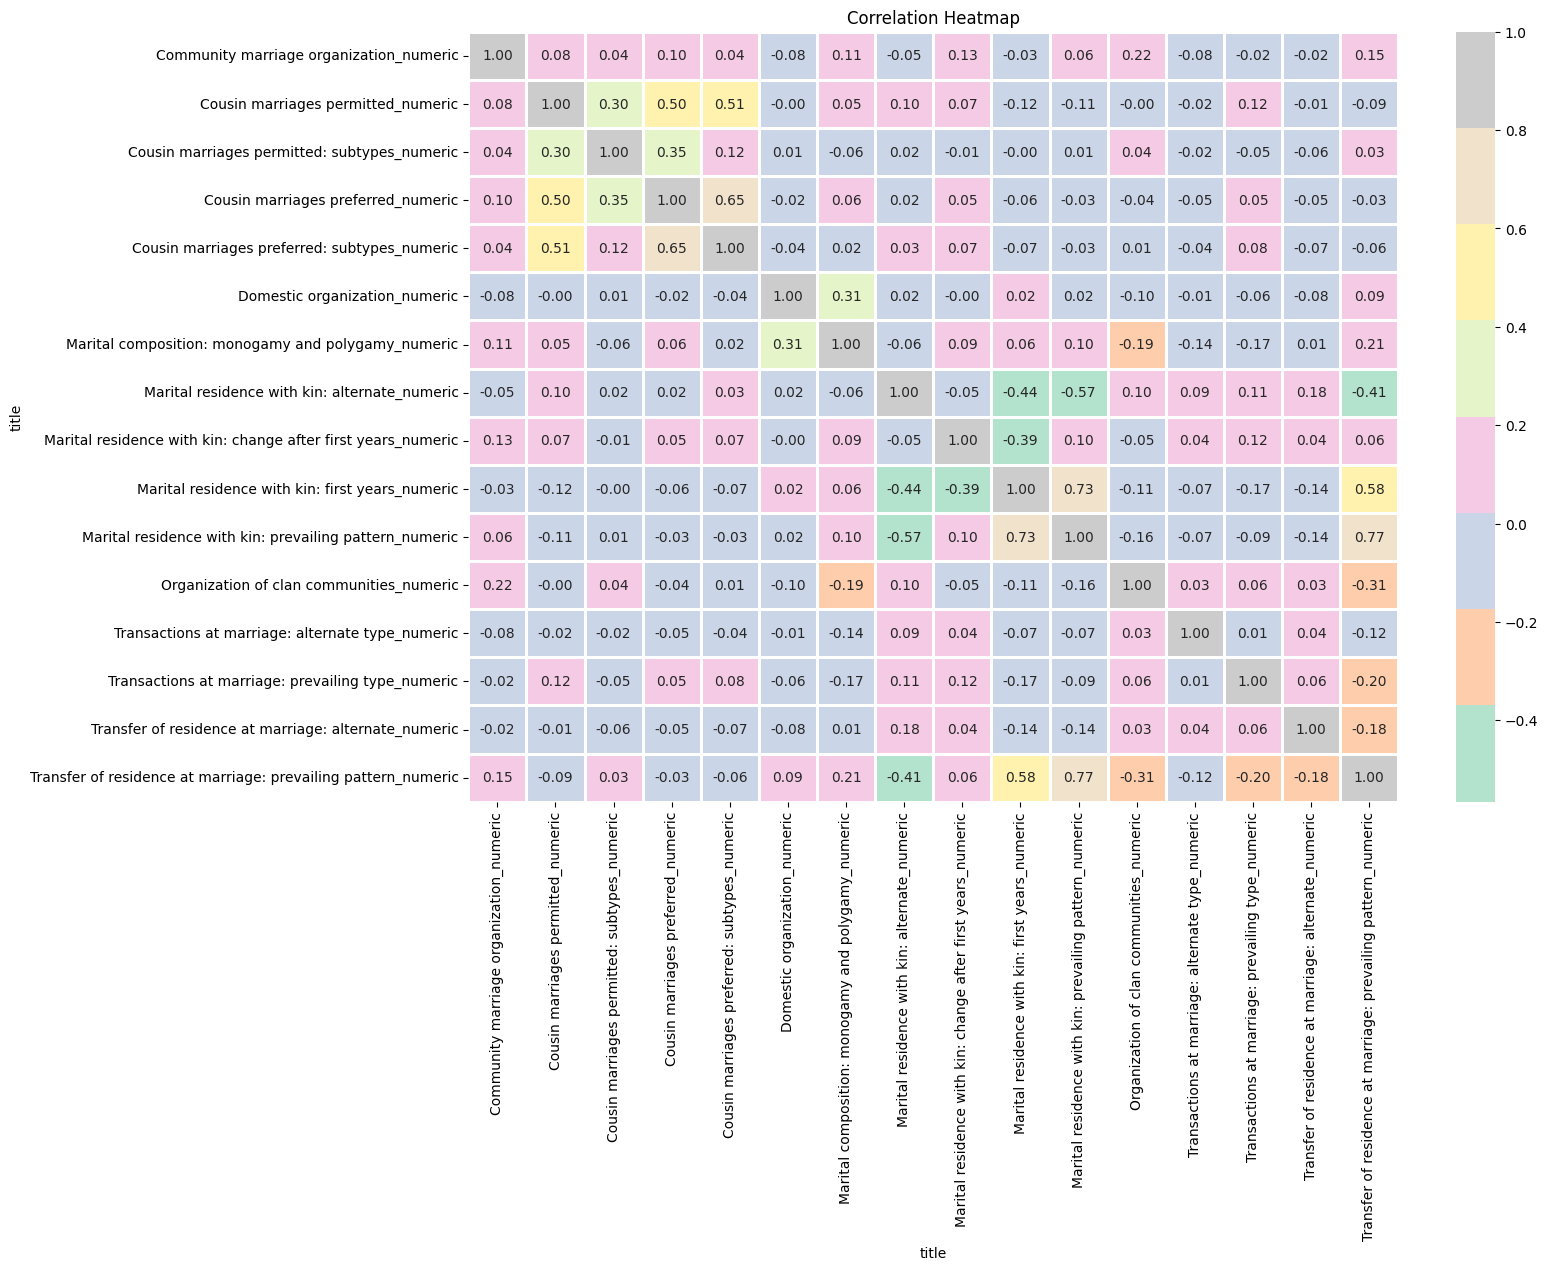

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Using Seaborn to create a heatmap
sns.heatmap(df_filtered_numeric.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

Láthatjuk, hogy nincsenek magasan korreláló változók, mindegyik 0,85 alatti. Ahol 0,65-0,75 közötti az érték, nem meglepő, mert ezek az értékek egymás alesetei. Pl.cousin marriage preferred és cousin marriage preferred: subtypes korrelációja 0,65

### 3.2 Scatterplot készítése

Második lépésként két dimenziós vektorokat csinálunk a 16 feature-ből/változóból és 2D-ben ábrázoljuk őket. Arra vagyunk kíváncsiak, vannak-e csoportosulások.

In [44]:
import umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(df_filtered_numeric)
embedding.shape

(914, 2)

In [45]:
df_final = df_filtered_numeric.reset_index()

In [46]:
xs = [e[0] for e in embedding]
ys = [e[1] for e in embedding]
df_filtered_numeric["x"] = xs
df_filtered_numeric["y"] = ys

In [47]:
data_dict = {"xs": xs,
            "ys": ys,
            "ts": df_final["pref_name_for_society"]}

In [48]:
dd = pd.DataFrame(data_dict)
dd.head()

,xs,ys,ts
0,10.813489,-1.739437,Yahgan
1,11.312573,-1.586706,Ona
2,15.235704,0.420012,Alacaluf
3,11.271083,3.521138,Tehuelche
4,15.750019,10.456098,Mapuche


In [49]:
import altair as alt

alt.Chart(dd).mark_circle(size=60).encode(
    x='xs:Q',
    y='ys:Q',
    tooltip='ts',
).properties(width=800, height=800).interactive()

alt.Chart(...)

3 jól elkülöníthető csoportot fedezhetünk fel és néhány outlier-t, ami elég ígéretes a klaszterelemzést illetően.

### 3.3 Térkép készítése

Harmadik lépésként megnézzük, földrajzilag mennyire változatos a vizsgált kultúrák/társadalmak.

Mivel eddig nem dolgoztunk az éghajlat adatokkal, ezért készítünk egy olyan adatbázist, ahol ezt is összegyúrjuk az eddig használt adatbázissal, majd térkpépre tesszük a társadalmakat.

In [50]:
df_all_features = pd.merge(df_final,climate_final, on=["soc_id"])
df_all_features.head()

,Lat,Long,pref_name_for_society,soc_id,Community marriage organization_numeric,Cousin marriages permitted_numeric,Cousin marriages permitted: subtypes_numeric,Cousin marriages preferred_numeric,Cousin marriages preferred: subtypes_numeric,Domestic organization_numeric,...,Marital residence with kin: change after first years_numeric,Marital residence with kin: first years_numeric,Marital residence with kin: prevailing pattern_numeric,Organization of clan communities_numeric,Transactions at marriage: alternate type_numeric,Transactions at marriage: prevailing type_numeric,Transfer of residence at marriage: alternate_numeric,Transfer of residence at marriage: prevailing pattern_numeric,AnnualMeanTemperature,MonthlyMeanPrecipitation
0,-55.02,-68.98,Yahgan,Sg1,3,5,2,7,4,2,...,1,11,11,2,5,0,2,3,4.040226,106173.97620
1,-54.00,-69.00,Ona,Sg3,3,5,2,7,4,2,...,1,11,11,2,4,4,0,3,3.673221,99406.99295
2,-52.00,-74.00,Alacaluf,Sg5,0,0,4,7,4,2,...,0,10,2,2,4,4,2,0,5.833743,135790.88890
3,-46.00,-70.00,Tehuelche,Sg4,0,0,4,7,4,7,...,1,11,11,2,1,3,2,3,5.156873,51252.80265
4,-39.00,-68.00,Mapuche,Sg2,4,3,7,14,3,7,...,1,8,8,2,4,1,0,3,10.339714,41571.08374


In [51]:
import altair as alt
import pandas as pd
from vega_datasets import data

source = alt.topo_feature(data.world_110m.url, 'countries')
background = alt.Chart(source).mark_geoshape(
    fill='lightgray',
    stroke='white'
    ).properties(
    width=700,
    height=600
)
points = alt.Chart(df_all_features).mark_circle().encode(
    longitude='Long',
    latitude='Lat',
    size=alt.value(50),
    color=alt.Color().title("Az elemzésbe bevont társadalmak"),
    tooltip="pref_name_for_society",
).properties().interactive()

chart = background + points
chart

alt.LayerChart(...)

## 4. Adatok lementése csv-be

In [52]:
dd.to_csv('../data/twodimensions.csv', index=False)

In [53]:
df_all_features.to_csv('../data/numeric.csv', index=False)

## Hivatkozások

Fox, R. (1998). Kinship and marriage : an anthropological perspective. Cambridge University Press.
Hendry, J. (1999). Family, Kinship and Marriage. In: An Introduction to Social Anthropology. Palgrave, London. https://doi.org/10.1007/978-1-349-27281-5_12
Itao, K., & Kaneko, K. (2020). Evolution of kinship structures driven by marriage tie and competition. Proceedings of the National Academy of Sciences of the United States of America, 117(5), 2378–2384. https://doi.org/10.1073/pnas.1917716117
Lima-Ribeiro et al. (2015). 'ecoClimate' (v3.0) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.10179301
Murdock et al. (1999). 'Ethnographic Atlas' (v3.0) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.10177061
Ophir, A. G., & Solomon, N. G. (2020). What’s Love Got to Do with it: The Evolution of Monogamy. Frontiers Media SA.
Parker, S. (1996). Full Brother-Sister Marriage in Roman Egypt: Another Look. Cultural Anthropology, 11(3), 362–376. https://doi.org/10.1525/can.1996.11.3.02a00040